
# Hollow Core in infinite glass 

N0 Configuration in Bird

In [4]:
import numpy as np

from fiberamp.fiber.microstruct.bragg import BraggExact, plotlogf
from ngsolve.webgui import Draw
from ngsolve import CF
from scipy.optimize import newton


In [5]:
n_air = 1.00027717
n_glass = 1.4388164768221814

ns = [lambda x:n_air, lambda x:n_glass]

ts = [4.0775e-05, 1e-5 + 4.0775e-05]

mats = ['air', 'glass']

maxhs = [.1,.1]

In [6]:
A = BraggExact(ts=ts, mats=mats, ns=ns, maxhs=maxhs,
               wl=3.25e-6)

Boundary names not provided, using default names.


In [7]:
Draw(CF([n for n in A.ns]), A.mesh)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.23…

BaseWebGuiScene

In [8]:
# k_low = A.k0 * A.ns[0] * A.scale
k_low, k_high = A.k0 * np.min(A.ns) * A.scale, A.k0 * np.max(A.ns) * A.scale

outer = 'h2'
Ktype = 'kappa'
nu = 1

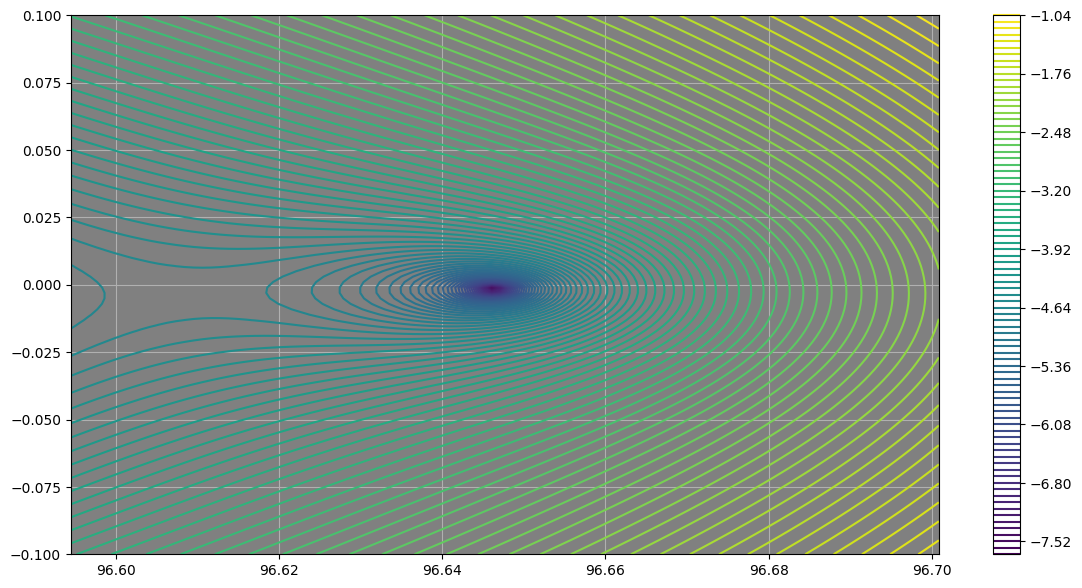

In [9]:
%matplotlib inline
plotlogf(A.determinant, .999 * k_low, 1.0001*k_low, -.1,.1, nu, outer, Ktype,
         iref=100, rref=100, levels=100)

In [10]:
guess = np.array(.9999*k_low)

beta1 = newton(A.determinant, guess, args=(nu, outer, Ktype), tol = 1e-16)

print("Scaled beta: ", beta1, ". Residual of determinant: ", abs(A.determinant(beta1, nu, outer, Ktype)))


Scaled beta:  (96.64625695173231-0.0016923771719853553j) . Residual of determinant:  2.397271754572206e-15


# Bragg Exact Fields

In [11]:
Fs = A.all_fields(beta1, nu=nu, outer=outer, Ktype=Ktype)

In [15]:
Draw(1/0.5821117086*Fs['Ez'], A.mesh)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.23…

BaseWebGuiScene

In [ ]:
Draw(Fs['Hz'], A.mesh)

In [ ]:
Draw(Fs['Etv'].real, A.mesh, vectors={'grid_size':150})


In [ ]:
Draw(1/46.3478181278*Fs['Etv'].Norm(), A.mesh)

In [ ]:
Draw(Fs['Ephi'], A.mesh)

# 1D cross sections

In [ ]:
fsA = A.fields_matplot(beta1, nu, outer)

In [ ]:
%matplotlib notebook
fig, ax = A.plot1D(fsA['Ez_rad'], double_r=True, rlist=[400,1000], nu=nu, maxscale=True, part='norm',
                  linewidth=1.5, color='k',  figsize=(12,6))
Rhos = A.rhos/A.scale

ax.arrow(0,0, Rhos[-1], 0, color='lightgray', width=.001, 
         head_width=.03, head_length=.1)
ax.arrow(0,0, -Rhos[-1], 0, color='lightgray', width=.001, 
         head_width=.03, head_length=.1)
# ax.set_ylim(-.2,1.2)

ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout()
m, M = ax.get_ylim()
for r in Rhos:
    ax.plot([r,r], [m, M], 'gray', linewidth=1.2, linestyle=':')
    ax.plot([-r,-r], [m, M], 'gray', linewidth=1.2, linestyle=':')
ax.set_xlabel('\nDistance from Fiber Center')
fig.savefig('/home/pv/papers/outer_materials/slides/figures/images/jpgs/bragg_N0_1Dlong.jpg')

In [ ]:
%matplotlib notebook

Etv_rad_norm = lambda x : (np.abs(fsA['Ex'](x,0))**2 + np.abs(fsA['Ey'](x,0))**2)**.5

fig, ax = A.plot1D(Etv_rad_norm, double_r=True, part='norm', rlist=[400,1000], nu=nu, maxscale=True,
                  linewidth=1.5, color='k',  figsize=(12,6))
Rhos = A.rhos/A.scale

ax.arrow(0,0, Rhos[-1], 0, color='lightgray', width=.001, 
         head_width=.015, head_length=.1)
ax.arrow(0,0, -Rhos[-1], 0, color='lightgray', width=.001, 
         head_width=.015, head_length=.1)


ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout()
m, M = ax.get_ylim()
for r in Rhos:
    ax.plot([r,r], [m, M], 'gray', linewidth=.8, linestyle=':')
    ax.plot([-r,-r], [m, M], 'gray', linewidth=.8, linestyle=':')
ax.set_xlabel('\nDistance from Fiber Center')
fig.savefig('/home/pv/papers/outer_materials/slides/figures/images/jpgs/bragg_N0_1Dtransverse.jpg')

In [ ]:
Draw(Fs['Hphi'], A.mesh)